## Infosys Ltd. - SQL Server Case Studies

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

In [100]:
## created dataset
conn=sqlite3.connect("infosys_clients.db")

In [101]:
print(type(conn))

<class 'sqlite3.Connection'>


In [102]:
df=pd.read_csv("Infosys_InternationalClients_10000.csv")
df.sample()

,ClientID,ClientName,Industry,Country,City,RevenueUSD,ContactName,ContactEmail
1412,3413,Core Services,Automotive,France,Marseille,12127537,Anna Dubois,anna.dubois@coreservices.com


In [103]:
#Checking data quality.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ClientID      10000 non-null  int64 
 1   ClientName    10000 non-null  object
 2   Industry      10000 non-null  object
 3   Country       10000 non-null  object
 4   City          10000 non-null  object
 5   RevenueUSD    10000 non-null  int64 
 6   ContactName   10000 non-null  object
 7   ContactEmail  10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [104]:
#checking dataset shape
df.shape

(10000, 8)

In [105]:
#cheking empty values
df.size

80000

In [106]:
#columns
df.columns

Index(['ClientID', 'ClientName', 'Industry', 'Country', 'City', 'RevenueUSD',
       'ContactName', 'ContactEmail'],
      dtype='object')

#### Univariate analysis ####

In [107]:
#revenue distribution.
df["RevenueUSD"].describe().reset_index()

,index,RevenueUSD
0,count,10000.00
1,mean,27516712.62
2,std,13059507.90
3,min,5005985.00
4,25%,16130909.00
5,50%,27515146.50
6,75%,39004743.25
7,max,49999704.00


In [108]:
#Categorical column distribution.
df.describe(include="object")

,ClientName,Industry,Country,City,ContactName,ContactEmail
count,10000,10000,10000,10000,10000,10000
unique,100,10,10,30,225,8046
top,Global Systems,Banking,Germany,Busan,Priya Rossi,alice.yamada@techpartners.com
freq,127,1028,1033,498,63,5


In [109]:
##City Distribution
df["City"].value_counts().reset_index()

,City,count
0,Busan,498
1,Seoul,485
2,Delhi,358
3,Mumbai,357
4,Kyoto,354
5,Sydney,353
6,Marseille,350
7,London,349
8,Rio de Janeiro,345
9,Berlin,345


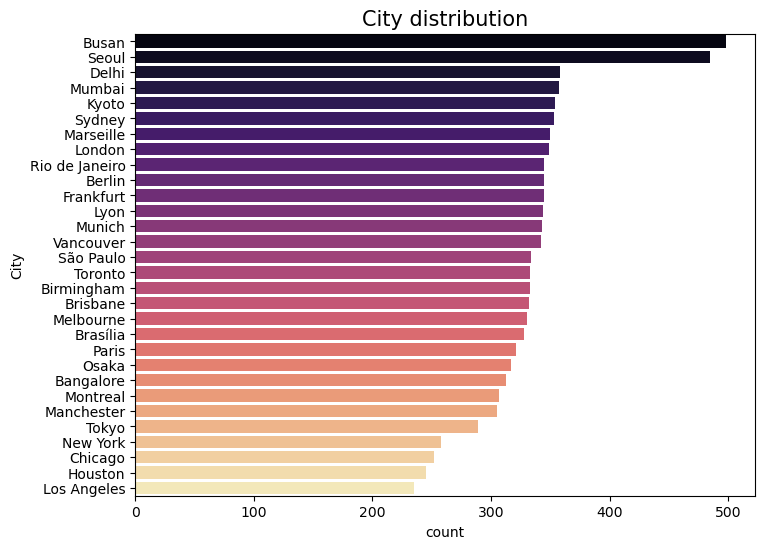

In [110]:
##City Distribution
city_wise_count=df["City"].value_counts().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=city_wise_count,x="count",y="City",palette="magma")
plt.title("City distribution",fontsize=15)
plt.show()

In [111]:
## Observation -- The Busan and Seoul are the top 2 cities.

#### Loading dataset to sql database.

In [112]:
df.to_sql(name="infosys_clients_table",con=conn,if_exists='replace',index=False)
print("data sucessfully loaded to sql")

data sucessfully loaded to sql


#### Bivariate exploration

Case Study 1: -- Revenue Analysis by Country for Strategic Expansion 

Objective: -- Infosys aims to analyze its global client base to identify countries with the highest revenue

contribution.
-- The strategy team will use this insight to focus sales efforts and allocate resources effectively.

Expected Outcome: -- This analysis will reveal high-value regions and help shape the 2026 business expansion strategy.

In [113]:
#1. Total revenue by country.
rev_by_country=('''select country,sum(revenueUSD) as total_rev
                from infosys_clients_table 
                group by Country
                order by total_rev desc''')
pd.read_sql(rev_by_country,conn)


,Country,total_rev
0,India,28264421842
1,Germany,28247298899
2,France,27748949669
3,Australia,27725688458
4,USA,27667755113
5,Brazil,27621660909
6,South Korea,27268772119
7,UK,27018386207
8,Canada,26827253224
9,Japan,26776939768


Text(0.5, 1.0, 'Contry wise revenue')

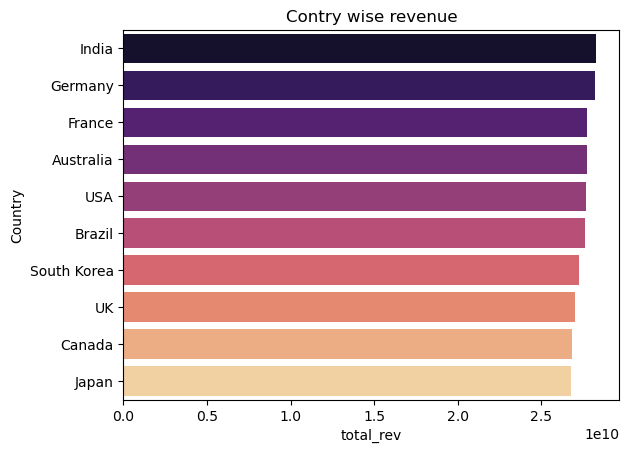

In [114]:
revenue_by_country=pd.read_sql(rev_by_country,conn)
sns.barplot(data=revenue_by_country,x="total_rev",y="Country",palette="magma")
plt.title("Contry wise revenue")

In [115]:
print("Explained le10")
print(2.8*1000000000)


Explained le10
2800000000.0


In [116]:
#2. Average revenue per client in each country.
avg_rev_per_client=('''SELECT 
    country, 
    SUM(revenueUSD) / COUNT(DISTINCT ClientName) AS avg_rev_per_client
FROM infosys_clients_table 
GROUP BY country
ORDER BY avg_rev_per_client DESC''')

pd.read_sql(avg_rev_per_client,conn)

,Country,avg_rev_per_client
0,India,282644218
1,Germany,282472988
2,France,277489496
3,Australia,277256884
4,USA,276677551
5,Brazil,276216609
6,South Korea,272687721
7,UK,270183862
8,Canada,268272532
9,Japan,267769397


[]

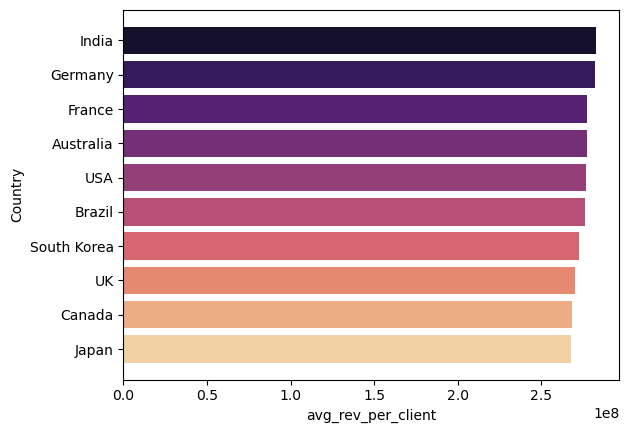

In [117]:
client_wise_avg_rev=pd.read_sql(avg_rev_per_client,conn)
sns.barplot(data=client_wise_avg_rev,y="Country",x="avg_rev_per_client",palette="magma")
plt.plot()

In [118]:
#3. Top 5 countries with the most clients.
top_5_countries=('''select country,count(ClientName) as Num_of_clients
                 from infosys_clients_table
                 group by country
                 order by num_of_clients Desc
                 limit 5''')

pd.read_sql(top_5_countries,conn)



,Country,Num_of_clients
0,Germany,1033
1,India,1028
2,France,1015
3,Australia,1015
4,Brazil,1007


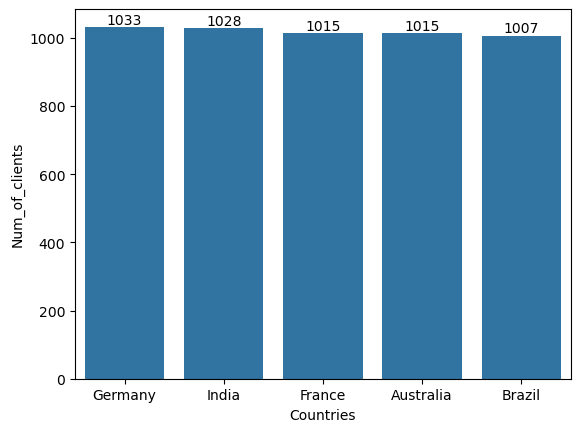

In [119]:
t_five_con=pd.read_sql(top_5_countries,conn)
ax=sns.barplot(data=t_five_con,x="Country",y="Num_of_clients")
plt.xlabel("Countries")
ax.bar_label(ax.containers[0])
plt.show()

In [120]:
#4. Countries with revenue above $5 million
contries_rev_above_5_million=('''select Country,sum(revenueUSD) as total_revenue
                              from infosys_clients_table
                              group by Country
                              having total_revenue>5000000
                              order by total_revenue desc''')

pd.read_sql(contries_rev_above_5_million,conn)

,Country,total_revenue
0,India,28264421842
1,Germany,28247298899
2,France,27748949669
3,Australia,27725688458
4,USA,27667755113
5,Brazil,27621660909
6,South Korea,27268772119
7,UK,27018386207
8,Canada,26827253224
9,Japan,26776939768


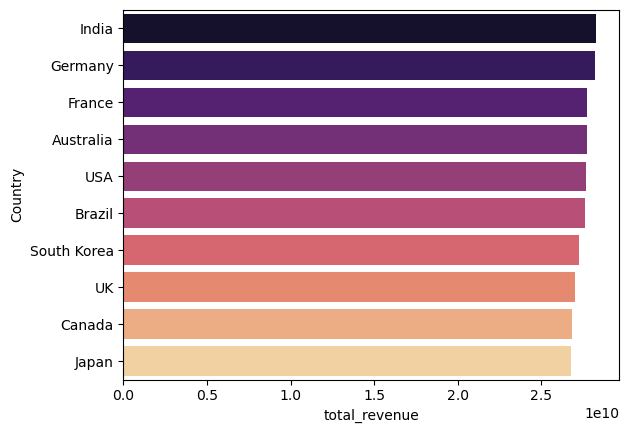

In [121]:
cont_abv_5_million_rev=pd.read_sql(contries_rev_above_5_million,conn)
sns.barplot(data=cont_abv_5_million_rev,y="Country",x="total_revenue",palette="magma")
plt.show()

Case Study 2: 
-- Industry-wise Performance and Account Management

Objective:
-- The client servicing team needs to evaluate how different industries are performing in terms of

revenue and account load.
-- This will help identify overburdened managers and industries requiring more support

In [122]:
# 1. Total and average revenue by industry.
total_and_avg_rev_by_industry=('''select industry, sum(revenueUSD) as total_revenue,
                               avg(revenueUSD) as avg_revenue
                               from infosys_clients_table
                               group by industry
                               order by total_revenue desc''')

pd.read_sql(total_and_avg_rev_by_industry,conn)

,Industry,total_revenue,avg_revenue
0,Electronics,28415136976,27695065.28
1,Banking,28230735570,27461805.03
2,E-commerce,28140940652,27945323.39
3,Pharmaceuticals,27852849126,28134191.04
4,Consulting,27524169810,27224698.13
5,Energy,27470925515,27388759.24
6,Food & Beverage,27408155419,27056421.93
7,Telecommunications,27148192179,27533663.47
8,Automotive,26817008473,27253057.39
9,IT Services,26159012488,27477954.29


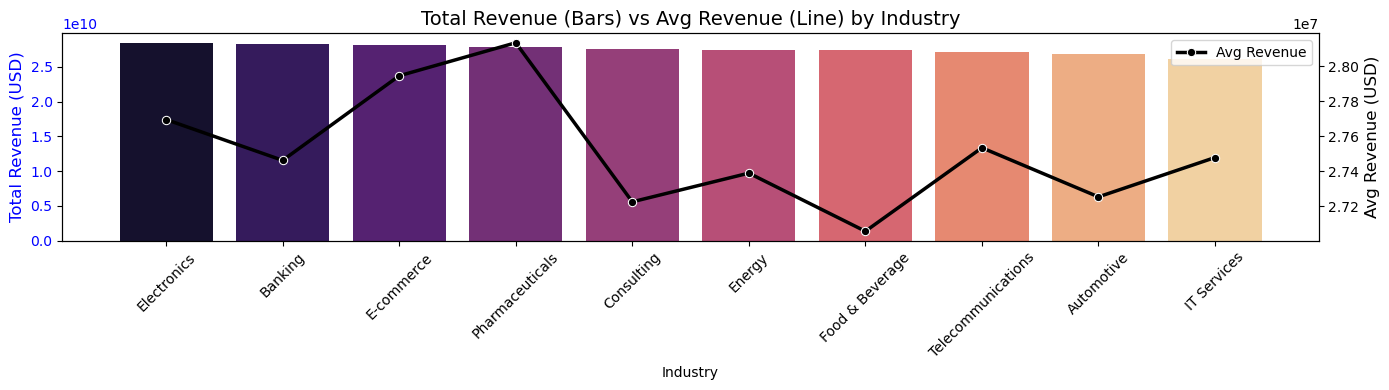

In [123]:
#saved str to pandas dataframe
total_and_avg_rev=pd.read_sql(total_and_avg_rev_by_industry,conn)

# 2. Figure aur Left Axis (Total Revenue - Bars)
fig, ax1 = plt.subplots(figsize=(14,4))

sns.barplot(x='Industry', y='total_revenue', data=total_and_avg_rev, ax=ax1, palette='magma')
ax1.set_ylabel('Total Revenue (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45) # Autofit rotation



# 3. Right Axis (Average Revenue - Line Plot)
ax2 = ax1.twinx() # used to created axis at right.
sns.lineplot(x='Industry', y='avg_revenue', data=total_and_avg_rev, ax=ax2, color='black', marker='o', linewidth=2.5, label='Avg Revenue')
ax2.set_ylabel('Avg Revenue (USD)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')


# 4. Autofit aur Labels
plt.title('Total Revenue (Bars) vs Avg Revenue (Line) by Industry', fontsize=14)
fig.tight_layout() # Autofit size
plt.show()

In [124]:
# 2. Number of clients per industry.
no_of_clients_per_industry=('''select industry, count(ClientName) as num_of_clients
                            from infosys_clients_table
                            group by industry
                            order by num_of_clients desc''')

pd.read_sql(no_of_clients_per_industry,conn)

,Industry,num_of_clients
0,Banking,1028
1,Electronics,1026
2,Food & Beverage,1013
3,Consulting,1011
4,E-commerce,1007
5,Energy,1003
6,Pharmaceuticals,990
7,Telecommunications,986
8,Automotive,984
9,IT Services,952


Text(0.5, 1.0, 'Clients per Industry')

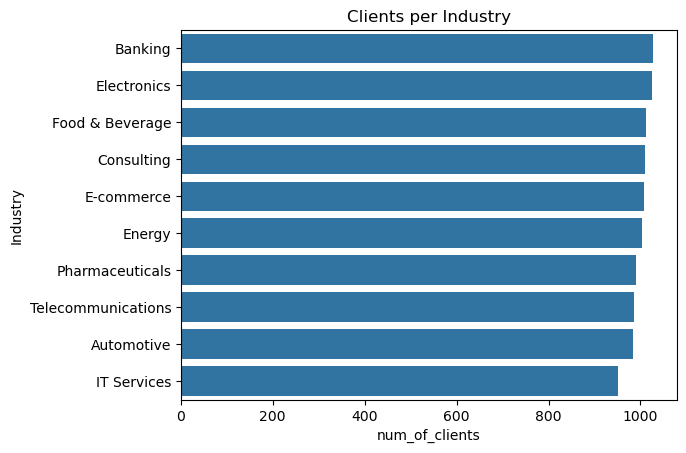

In [125]:
#Saved sql string data to DataFrame.
no_of_clients=pd.read_sql(no_of_clients_per_industry,conn)

sns.barplot(data=no_of_clients,y="Industry",x="num_of_clients")
plt.title("Clients per Industry")

In [126]:
# 3. Relationship managers handling more than 55 clients.
manager_more_than50_clients=('''select contactName, count(clientName) as total_clients
                             from infosys_clients_table
                             group by contactName
                             having total_clients>55
                             order by total_clients desc ''')

pd.read_sql(manager_more_than50_clients,conn)

,ContactName,total_clients
0,Priya Rossi,63
1,Priya Yamada,60
2,Ravi Nair,59
3,Sean Smith,58
4,Kenji Lee,58
5,Sean Rossi,57
6,Oliver Hamilton,56


In [127]:
# 4. Industries with average revenue per client above $4 million
avg_rev_per_client_above_4millions='''
select industry,
        -- The outer query here is doing average of the total revenue calculated by the subquery.
        avg(total_rev) as client_wise_avg_rev
from
    --This subquery here is getting client wise total of the revenue per industry
    (select industry,clientName,sum(revenueUSD) as total_rev
    from infosys_clients_table
    group by industry,clientName) 

group by industry
having client_wise_avg_rev>4000000

'''

pd.read_sql(avg_rev_per_client_above_4millions,conn)

,industry,client_wise_avg_rev
0,Automotive,268170084.73
1,Banking,282307355.70
2,Consulting,275241698.10
3,E-commerce,281409406.52
4,Electronics,284151369.76
5,Energy,274709255.15
6,Food & Beverage,274081554.19
7,IT Services,261590124.88
8,Pharmaceuticals,278528491.26
9,Telecommunications,271481921.79


In [ ]:
## Observations
#    1. Busan and Seoul are the top 2 cities based on the contribution.
#    2. Based on total revenue by country INDIA is on the top.
#    3. Countries who has most clients are (Germany, India, France, Australia and Brazil, aaranged in the descending order)
#    4. Total and Average revenue by industry (Electronic is on the 1st, Banking is on the 2nd and E-commerce is on the 3rd rank)
#    5. Banking, Electronics and Food&Beverage are the most clients contributors Industry.
#    6. Priya Rossi, Priya Yamada, Ravi Nair, Sean Smith, Kenji Lee, Sean Rosi and Oliver are the Relationship managers handling more than 55 clients.
